In [1]:
import ctsb
import jax.numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/johnhallman/mlcourse/mlenv/lib/python3.6/site-packages/jax/lib/xla_bridge.py:130: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [2]:
T = 100
p, q = 3, 3

In [3]:
ctsb.set_key(0)

In [4]:
problem = ctsb.problem("ARMA-v0")
x_0 = problem.initialize(p, q)

In [5]:
last_value = ctsb.model("LastValue")
last_value.initialize()

predict_zero = ctsb.model("PredictZero")
predict_zero.initialize()

In [6]:
exp = ctsb.Experiment()
MSE = lambda y_true, y_pred: (y_true - y_pred)**2
exp.initialize([(problem, x_0, [last_value, predict_zero])], MSE, T)
exp.run_all_experiments()

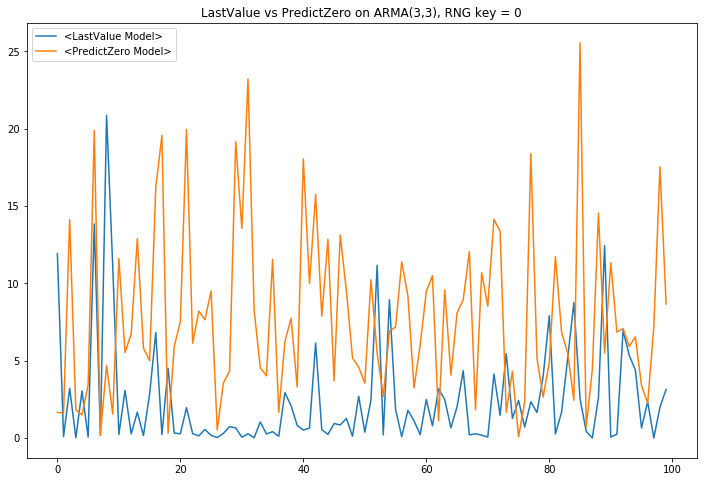

In [7]:
plt.figure(figsize=(12,8))
prob_model_to_loss = exp.get_prob_model_to_loss()
for problem, model_to_loss in prob_model_to_loss.items():
    for model, loss in model_to_loss.items():
        plt.plot(loss, label=model)
plt.legend()
plt.title("LastValue vs PredictZero on ARMA(3,3), RNG key = 0")
plt.show()